In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("census.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

We have 32560 rows and 15 columns in the dataset

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

These are the total columns present in the dataset,where Income is our target variable

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In df dataset we have string and integer type data,hence we need to apply encoding here

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We dont have any null values present in the dataset

In [7]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In Target/dependable variable is binary in nature

Income has two type of class i.e,
(i) equal or less than 50k and 
(ii) greater than 50k

In [8]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Class imbalance is present as in <=50k we have 24719 counts and >50k we have 7841 counts

# APPLY ENCODING

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [10]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [11]:
df.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income            float64
dtype: object

We convert the datas from string to float type by using  OrdinalEncoder

In [17]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


Here is the statistical summary of df dataset

Key observation:
 
 1. The mean higher than the median(50th percentile) in columns 'Age','Marital_status','Capital_gain',skewness might be present in these columns
 2. we observe difference between the 75th percentile and max in column 'Capital_gain','Capital_loss',outliers can be present in these columns


# DATA VISUALIZATION 

To check he missing values

<AxesSubplot:>

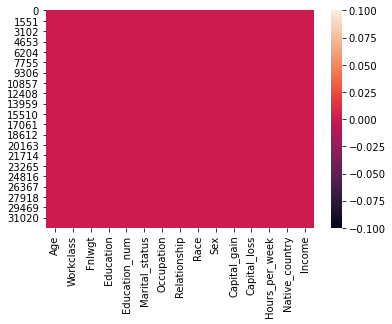

In [12]:
sns.heatmap(df.isnull())

No missing values are present in df dataset

# To check the correlation

In [13]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

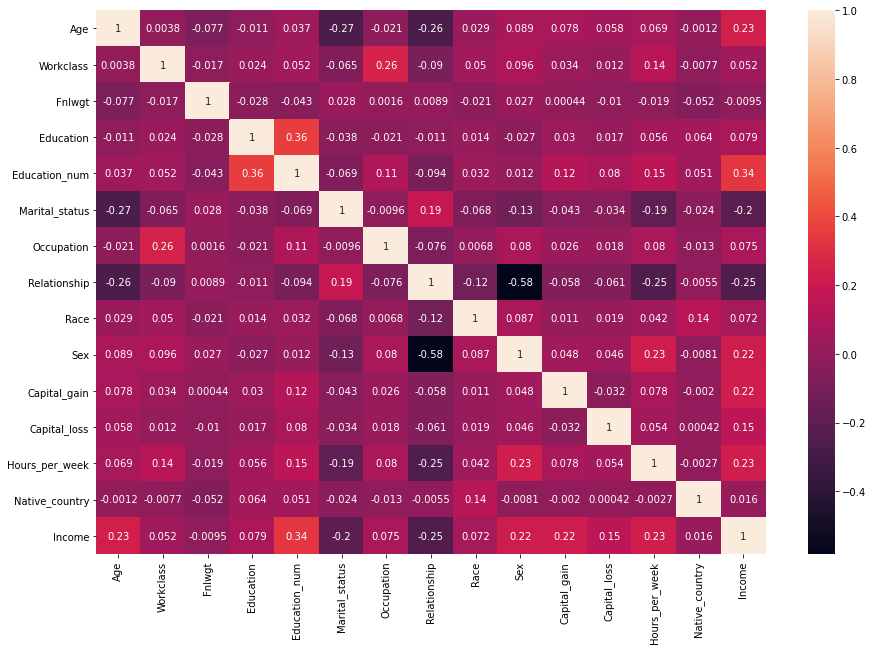

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

Observation:
    
    Light shades are highly correlated
    "Income" is positively correlated with column "Age",'Education_num','Sex','Capital_gain','Hours_per_week' and
    negatively correlated with column 'Marital_status','Relationship','Fnlwgt'

# TO CHECK THE COUNT OF DATA IN TARGET COLUMN

<AxesSubplot:xlabel='Income', ylabel='count'>

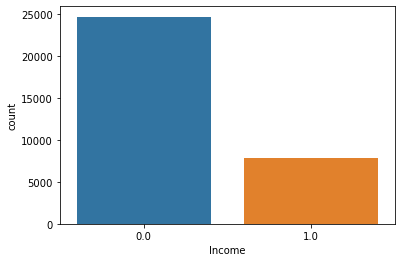

In [16]:
sns.countplot(df["Income"])

Datas are not equally distributed,class imbalanced present

# TO CHECK THE DISTRIBUTION OF DATA IN COLUMNS

<AxesSubplot:xlabel='Age', ylabel='Density'>

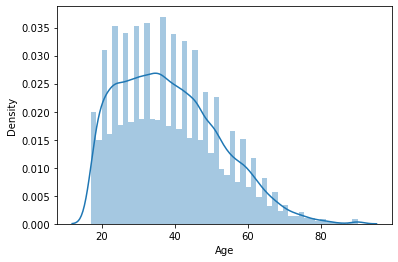

In [18]:
sns.distplot(df["Age"])

Skewness is present in df["Age"]

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

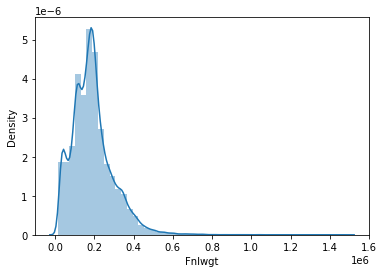

In [20]:
sns.distplot(df["Fnlwgt"])

Skewness is present in df["Fnlwgt"]

<AxesSubplot:xlabel='Education', ylabel='Density'>

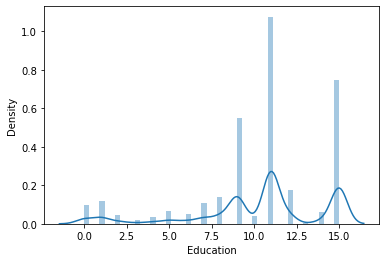

In [21]:
sns.distplot(df["Education"])

Skewness is present in df["Education"]

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

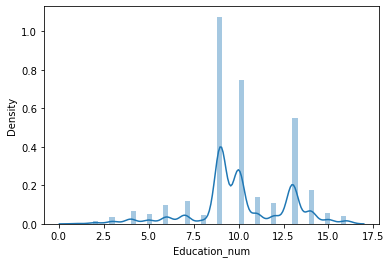

In [22]:
sns.distplot(df["Education_num"])

Skewness is present in df["Education_num"]

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

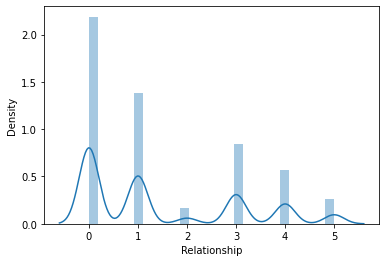

In [26]:
sns.distplot(df["Relationship"])

datas are not equally distributed in df["Relationship"]

<AxesSubplot:xlabel='Race', ylabel='Density'>

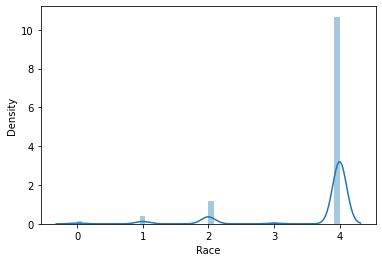

In [27]:
sns.distplot(df["Race"])

datas are not equally distributed in df["Race"]

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

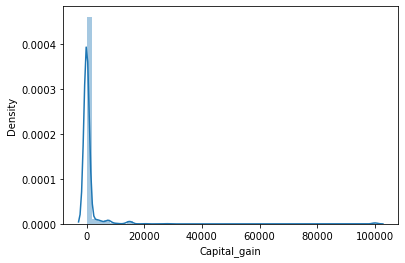

In [29]:
sns.distplot(df["Capital_gain"])

datas are not equally distributed in df["Capital_gain"]

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

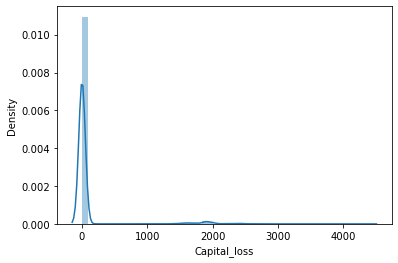

In [30]:
sns.distplot(df["Capital_loss"])

datas are not equally distributed in df["Capital_loss"]

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

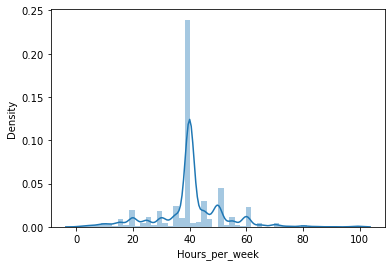

In [31]:
sns.distplot(df["Hours_per_week"])

datas are equally distributed in df["Hours_per_week"]

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

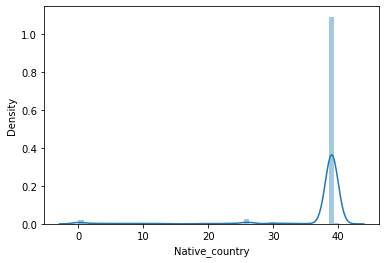

In [32]:
sns.distplot(df["Native_country"])

skewness is present in the column

# TO CHECK THE FREQUENCY OF THE DATA IN THE COLUMNS

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Count'>

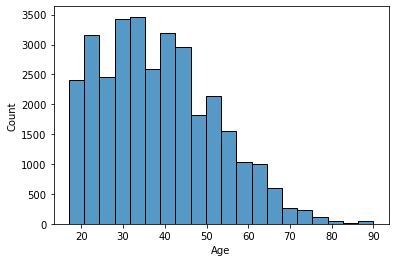

In [33]:
sns.histplot(df["Age"],bins=20)

in "Age" data count is mostly between 20 to 50

<AxesSubplot:xlabel='Workclass', ylabel='Count'>

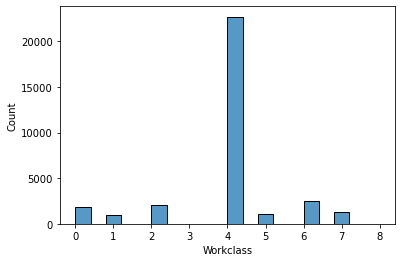

In [34]:
sns.histplot(df["Workclass"],bins=20)

in "Workclass"high data count is at 4

<AxesSubplot:xlabel='Fnlwgt', ylabel='Count'>

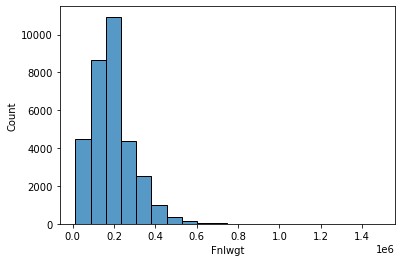

In [35]:
sns.histplot(df["Fnlwgt"],bins=20)

in "Fnlwgt" data count is mostly between 0.0 to 0.4

<AxesSubplot:xlabel='Education', ylabel='Count'>

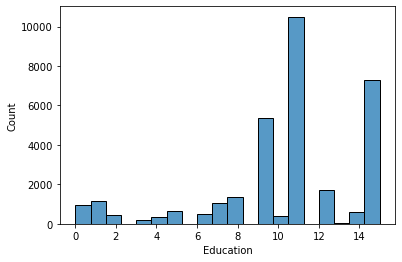

In [36]:
sns.histplot(df["Education"],bins=20)

in "Eduction" data count is mostly between 9 to 15

<AxesSubplot:xlabel='Education_num', ylabel='Count'>

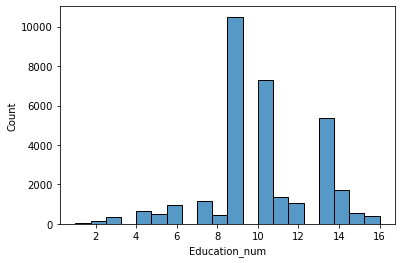

In [37]:
sns.histplot(df["Education_num"],bins=20)

in "Eduction_num" data count is mostly between 9 to 13

<AxesSubplot:xlabel='Race', ylabel='Count'>

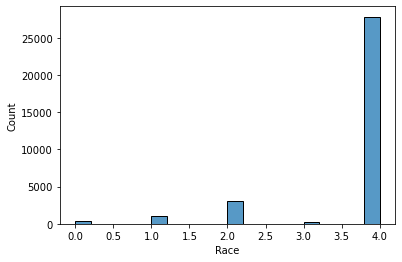

In [41]:
sns.histplot(df["Race"],bins=20)

in "Race" data count is mostly at 4.0

<AxesSubplot:xlabel='Capital_gain', ylabel='Count'>

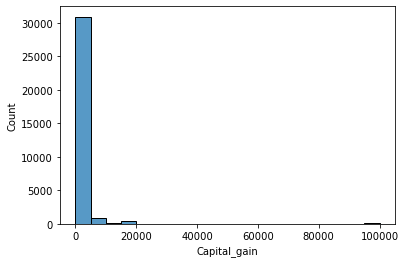

In [43]:
sns.histplot(df["Capital_gain"],bins=20)

in "Capital_gain" data count is 0 to 20000

<AxesSubplot:xlabel='Native_country', ylabel='Count'>

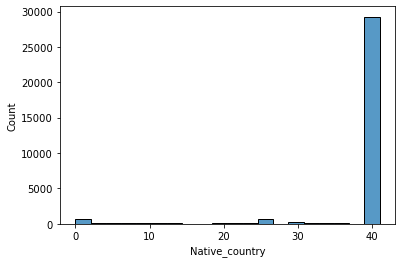

In [45]:
sns.histplot(df["Native_country"],bins=20)

in "Native_country" data count is mostly at 40 

# TO CHECK THE RELATION OF EACH COLUMN TARGET VARIABLE

<AxesSubplot:xlabel='Age', ylabel='Income'>

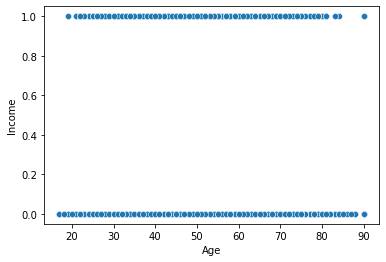

In [47]:
sns.scatterplot(x="Age",y="Income",data=df)

The "Äge" has appeared from the count of 20 to 90

<AxesSubplot:xlabel='Workclass', ylabel='Income'>

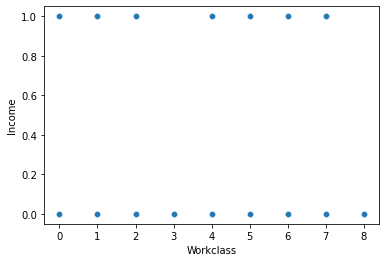

In [48]:
sns.scatterplot(x="Workclass",y="Income",data=df)

The "Workclass" has appeared from the count of 0 to 8

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

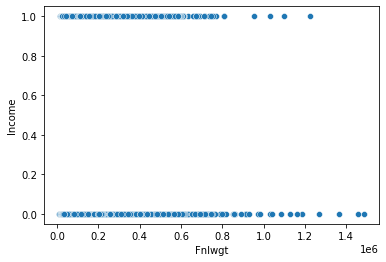

In [49]:
sns.scatterplot(x="Fnlwgt",y="Income",data=df)

The "Fnlwgt" data has appeared from the count of 0.0 to 1.5

<AxesSubplot:xlabel='Education', ylabel='Income'>

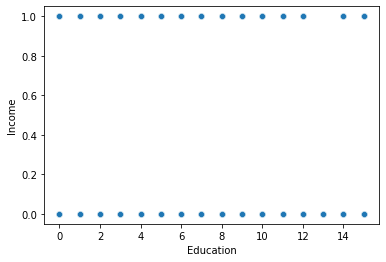

In [50]:
sns.scatterplot(x="Education",y="Income",data=df)

The "Education" has appeared from the count of 0 to 15

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

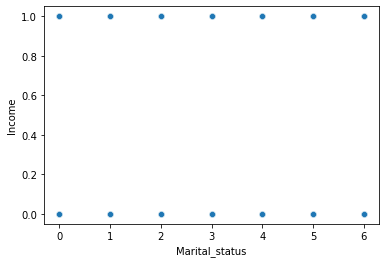

In [51]:
sns.scatterplot(x="Marital_status",y="Income",data=df)

The "Marital_status" has appeared from the count of 0 to 6

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

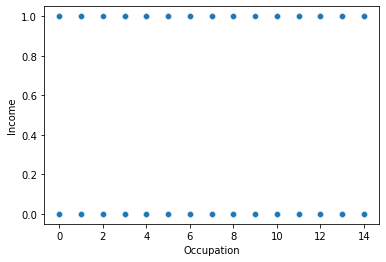

In [52]:
sns.scatterplot(x="Occupation",y="Income",data=df)

The "Occupation" has appeared from the count of 0 to 14

<AxesSubplot:xlabel='Relationship', ylabel='Income'>

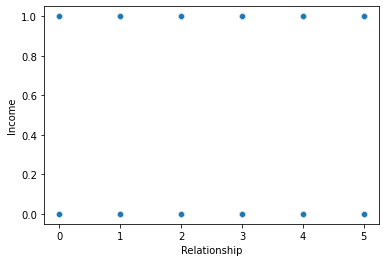

In [53]:
sns.scatterplot(x="Relationship",y="Income",data=df)

The "Relationship" has appeared from the count of 0 to 5

<AxesSubplot:xlabel='Race', ylabel='Income'>

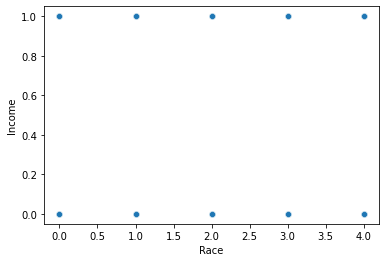

In [54]:
sns.scatterplot(x="Race",y="Income",data=df)

The "Race" has appeared from the count of 0.0 to 4.0

<AxesSubplot:xlabel='Sex', ylabel='Income'>

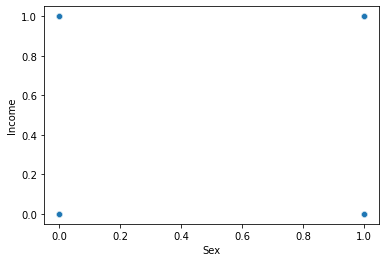

In [55]:
sns.scatterplot(x="Sex",y="Income",data=df)

The "Sex" has appeared from the count of 0.0 and 1.0

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

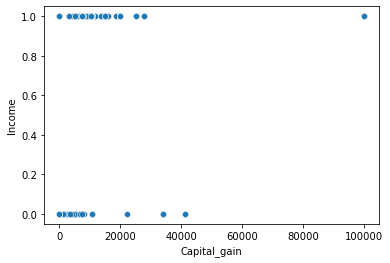

In [56]:
sns.scatterplot(x="Capital_gain",y="Income",data=df)

The "Capital_gain" has appeared from the count of 0 to 40000

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

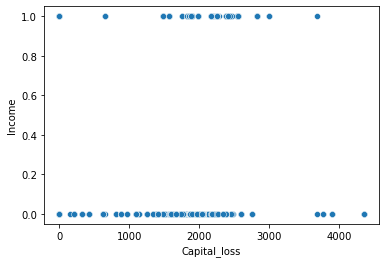

In [57]:
sns.scatterplot(x="Capital_loss",y="Income",data=df)

The "Capital_loss" has appeared from the count of 0 to 4000

<AxesSubplot:xlabel='Native_country', ylabel='Income'>

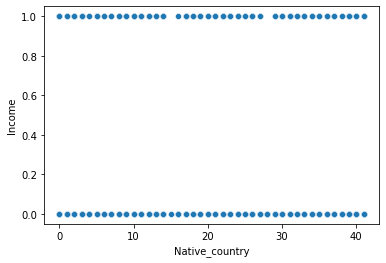

In [58]:
sns.scatterplot(x="Native_country",y="Income",data=df)

The "Native_country" has appeared from the count of 0 to 45

# PLOTTING OUTLIERS

### UNIVARIATE ANALYSIS

<AxesSubplot:>

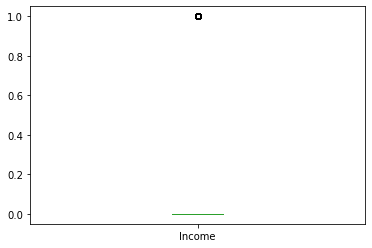

In [59]:
df["Income"].plot.box()

Outliers are present in "Income" column

<AxesSubplot:>

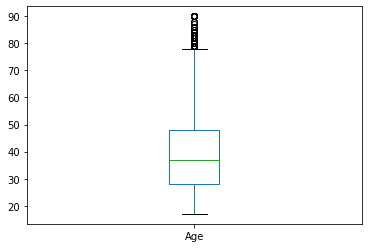

In [60]:
df["Age"].plot.box()

Outliers are present in "Age" column

<AxesSubplot:>

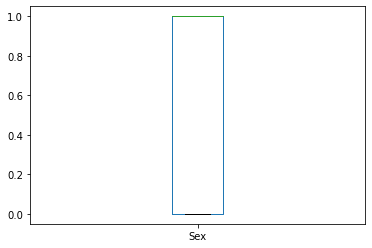

In [61]:
df["Sex"].plot.box()

Outliers are present in "Sex" column

# BIVARIATE ANALYSIS

To check outliers of all the columns together we need to apply below code here

Age                  AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Workclass         AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Fnlwgt            AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Education         AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Education_num     AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Marital_status    AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Occupation        AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Relationship      AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Race                    AxesSubplot(0.125,0.125;0.0824468x0.343182)
Sex                  AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Capital_gain         AxesSubplot(0.322872,0.125;0.0824468x0.343182)
Capital_loss         AxesSubplot(0.421809,0.125;0.0824468x0.343182)
Hours_per_week       AxesSubplot(0.520745,0.125;0.0824468x0.343182)
Native_country       AxesSubplot(0.619681,0.125;0.0824468x0.343182)
Income               AxesSubplot(0.718617,0.125;

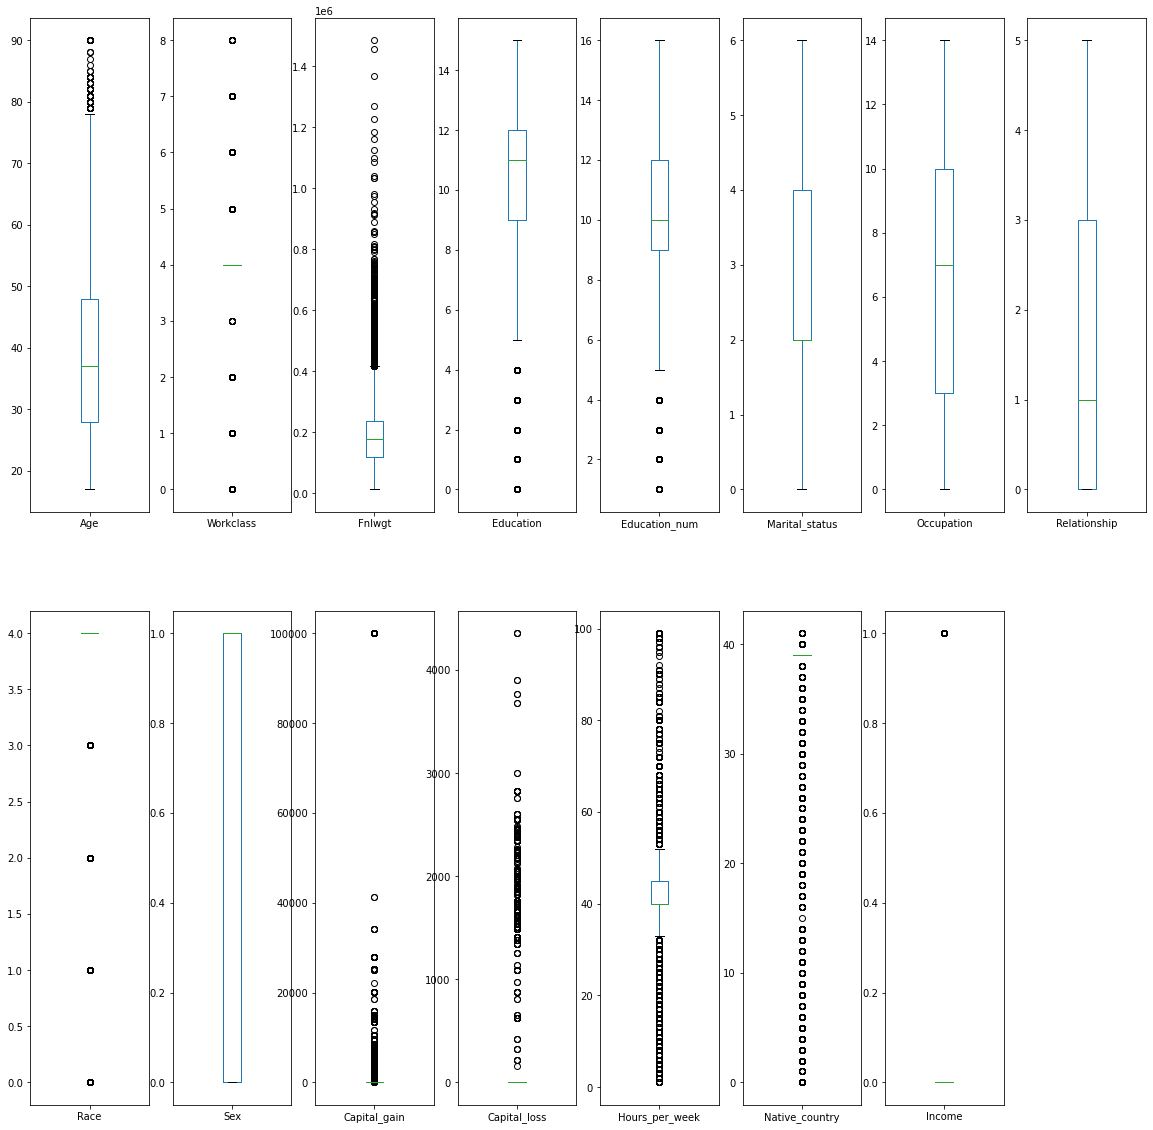

In [63]:
df.plot(kind="box",subplots=True,layout=(2,8),figsize=(20,20))    

We have outliers present in 'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Race','Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'

From the statistical summary and the presence of outliers in column "Capital_gain" and "Capital_loss" we are going to drop these columns

In [65]:
df.drop(["Capital_gain","Capital_loss"],axis=1,inplace=True)

In [66]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [67]:
df.shape

(32560, 13)

Dropped columns are no longer present in df dataset

# DETECTING OUTLIERS

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.83709708, 1.46388339, 1.0087417 , ..., 2.22212013, 0.29157343,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.24504633, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.05703146, 0.09012148, 0.42576955, ..., 0.03542999, 0.29157343,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.3588108 , ..., 0.03542999, 0.29157343,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.11092744, ..., 1.65520046, 0.29157343,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.92986178, ..., 0.03542999, 0.29157343,
        1.77553698]])

In [69]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([11, 10,  8, ...,  8,  8,  8], dtype=int64))


In [70]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,40,39.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,40,39.0,0.0
5,49,4.0,160187,6.0,5,3.0,8.0,1.0,2.0,0.0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,20,39.0,0.0


In [71]:
3333/32560

0.10236486486486486

We have lost 10% data by removing outliers

Hence we are not going to continue with df_new as the data loss is quite high 

In [72]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,20,39.0,0.0


# DIVIDING THE COLUMNS AS x AND y

In [73]:
x=df.drop("Income",axis=1)
y=df["Income"]

# APPLYING variance_inflation_factor

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
x.shape

(32560, 12)

In [77]:
x.shape[1]

12

In [78]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [79]:
vif_calc()

    VIF FACTOR        features
0     8.499626             Age
1     8.475515       Workclass
2     4.031078          Fnlwgt
3     9.204142       Education
4    18.142827   Education_num
5     3.971182  Marital_status
6     3.711100      Occupation
7     2.607777    Relationship
8    17.565204            Race
9     4.440975             Sex
10   12.133638  Hours_per_week
11   19.690227  Native_country


We have high correlation between column "Age" & "Workclass","Fnlwgt" & "Sex", "Marital_status" & "Occupation"

Where "Marital_status","Fnlwgt","Workclass" is providing less value,hence we will drop these columns

In [81]:
df.drop(["Marital_status","Workclass","Fnlwgt"],axis=1,inplace=True)

In [82]:
df.columns

Index(['Age', 'Education', 'Education_num', 'Occupation', 'Relationship',
       'Race', 'Sex', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

Dropped columns are no longer present in df dataset

# REMOVING THE SKEWNESS 

In [83]:
df.skew()

Age               0.558738
Education        -0.934063
Education_num    -0.311630
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

In [84]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [85]:
x

array([[ 0.89194656,  1.64422286, -1.08988899, ...,  0.70308748,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ...,  0.70308748,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ...,  0.70308748,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -1.42229812,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ...,  0.70308748,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -1.42229812,
        -0.03557001,  0.32907402]])

Applied power_transform method to remove the skewness 

# APPLYING SMOTE TECHNIQUE FOR IMBALANCED DATA

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
smt=SMOTE()

In [88]:
train_x,train_y=smt.fit_resample(x,y)

In [89]:
train_y.value_counts()

1.0    24719
0.0    24719
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

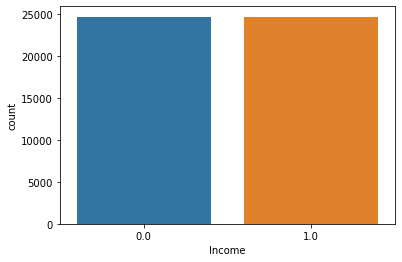

In [90]:
sns.countplot(train_y)

By using smote technique we make the data balanced 

# APPLYING SCALING

In [91]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.89194656,  1.64422286, -1.08988899, ...,  0.70308748,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ...,  0.70308748,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ...,  0.70308748,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -1.42229812,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ...,  0.70308748,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -1.42229812,
        -0.03557001,  0.32907402]])

In [92]:
x

array([[ 0.89194656,  1.64422286, -1.08988899, ...,  0.70308748,
        -2.22151541,  0.32907402],
       [ 0.10271741,  0.01186427,  0.39874263, ...,  0.70308748,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ...,  0.70308748,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455599,  0.01186427, -0.2197547 , ..., -1.42229812,
        -0.03557001,  0.32907402],
       [-1.35834147,  0.01186427,  0.27166793, ...,  0.70308748,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -1.42229812,
        -0.03557001,  0.32907402]])

applying scaling technique to make all the data even 

# APPLYING VARIOUS MODEL TO GET THE BEST ACCURACY SCORE

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
from sklearn.metrics import accuracy_score 

In [94]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=71)

### LogisticRegression

In [96]:
lr.fit(train_x,train_y)
pred_train=lr.predict(train_x)
pred_test=lr.predict(test_x)
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      4936
         1.0       0.67      0.45      0.54      1576

    accuracy                           0.81      6512
   macro avg       0.75      0.69      0.71      6512
weighted avg       0.80      0.81      0.80      6512



By applying LogisticRegression we are getting the accuracy of 0.81

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

### DecisionTreeClassifier

In [99]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred=dtc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      4936
         1.0       0.52      0.55      0.54      1576

    accuracy                           0.77      6512
   macro avg       0.69      0.70      0.69      6512
weighted avg       0.78      0.77      0.77      6512



By applying DecisionTreeClassifier we are getting the accuracy of 0.77

### RandomForestClassifier

In [100]:
rfc=RandomForestClassifier()
rfc.fit(train_x,train_y)
pred=rfc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4936
         1.0       0.67      0.58      0.62      1576

    accuracy                           0.83      6512
   macro avg       0.77      0.74      0.76      6512
weighted avg       0.82      0.83      0.83      6512



We are getting the accuracy of 0.83 by using RandomForestClassifier

### SVC

In [101]:
svc=SVC()
svc.fit(train_x,train_y)
pred=svc.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      4936
         1.0       0.71      0.49      0.58      1576

    accuracy                           0.83      6512
   macro avg       0.78      0.71      0.73      6512
weighted avg       0.82      0.83      0.82      6512



We are getting the accuracy of 0.83 by using SupportVectorClassifier

### KNeighborsClassifier

In [102]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
pred=knn.predict(test_x)
acc=classification_report(test_y,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      4936
         1.0       0.63      0.60      0.62      1576

    accuracy                           0.82      6512
   macro avg       0.75      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512



We are getting the accuracy of 0.82 by using KNeighborsClassifier

# CHECKING THE CROSS VALIDATION SCORE WITH ACCURACY SCORE

### Checking the cross validation score of LogisticRegression 

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
cv=cross_val_score(lr,x,y,cv=2).mean()
print(cv)

0.8126842751842751


In [106]:
cv=cross_val_score(dtc,x,y,cv=2).mean()
print(cv)

0.7721437346437346


In [107]:
cv=cross_val_score(rfc,x,y,cv=2).mean()
print(cv)

0.826965601965602


In [108]:
cv=cross_val_score(svc,x,y,cv=2).mean()
print(cv)

0.8252764127764127


In [109]:
cv=cross_val_score(knn,x,y,cv=2).mean()
print(cv)

0.8138820638820639


RandomForestClassifier is providing the best accuracy_score as its has less difference between the accuracy score and cv score

# AUC ROC CURVE

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [112]:
y_pred_prob=rfc.predict_proba(test_x)[:,1]
y_pred_prob

array([0.  , 0.59, 0.  , ..., 0.02, 0.03, 0.  ])

In [113]:
fpr,tpr,threshold=roc_curve(test_y,y_pred_prob)

In [114]:
fpr

array([0.00000000e+00, 4.05186386e-04, 1.21555916e-03, 1.82333874e-03,
       2.02593193e-03, 3.24149109e-03, 3.84927066e-03, 5.06482982e-03,
       5.87520259e-03, 6.48298217e-03, 6.88816856e-03, 7.90113452e-03,
       7.90113452e-03, 8.50891410e-03, 9.72447326e-03, 1.03322528e-02,
       1.15478120e-02, 1.33711507e-02, 1.51944895e-02, 1.53970827e-02,
       1.64100486e-02, 1.74230146e-02, 1.86385737e-02, 1.94489465e-02,
       2.10696921e-02, 2.32982172e-02, 2.39059968e-02, 2.57293355e-02,
       2.79578606e-02, 2.97811994e-02, 3.14019449e-02, 3.38330632e-02,
       3.74797407e-02, 3.99108590e-02, 4.23419773e-02, 4.23419773e-02,
       4.39627229e-02, 4.57860616e-02, 4.74068071e-02, 5.02431118e-02,
       5.36871961e-02, 5.61183144e-02, 6.01701783e-02, 6.38168558e-02,
       6.52350081e-02, 6.70583468e-02, 7.00972447e-02, 7.29335494e-02,
       7.65802269e-02, 7.96191248e-02, 8.24554295e-02, 8.54943274e-02,
       8.99513776e-02, 9.44084279e-02, 9.94732577e-02, 1.01904376e-01,
      

In [115]:
tpr

array([0.        , 0.00634518, 0.01522843, 0.02474619, 0.03553299,
       0.04758883, 0.0571066 , 0.07043147, 0.08692893, 0.10025381,
       0.11357868, 0.12753807, 0.12817259, 0.13832487, 0.15672589,
       0.16814721, 0.18401015, 0.19225888, 0.19923858, 0.21002538,
       0.22461929, 0.23730964, 0.24809645, 0.26142132, 0.26967005,
       0.28489848, 0.2963198 , 0.30774112, 0.31916244, 0.3286802 ,
       0.34010152, 0.34835025, 0.36484772, 0.37753807, 0.3857868 ,
       0.38642132, 0.39403553, 0.40545685, 0.41751269, 0.42829949,
       0.44225888, 0.45748731, 0.46637056, 0.4784264 , 0.49492386,
       0.50317259, 0.51586294, 0.52601523, 0.53616751, 0.55203046,
       0.56218274, 0.56852792, 0.5786802 , 0.58946701, 0.59771574,
       0.60850254, 0.61992386, 0.62880711, 0.63832487, 0.64974619,
       0.65989848, 0.66116751, 0.66751269, 0.67893401, 0.68845178,
       0.69670051, 0.70558376, 0.71573604, 0.72588832, 0.73286802,
       0.74492386, 0.75634518, 0.76840102, 0.77791878, 0.78680

In [116]:
threshold

array([2.        , 1.        , 0.99      , 0.98      , 0.97      ,
       0.96      , 0.95      , 0.94      , 0.93      , 0.92      ,
       0.91      , 0.9       , 0.89166667, 0.89      , 0.88      ,
       0.87      , 0.86      , 0.85      , 0.84      , 0.83      ,
       0.82      , 0.81      , 0.8       , 0.79      , 0.78      ,
       0.77      , 0.76      , 0.75      , 0.74      , 0.73      ,
       0.72      , 0.71      , 0.7       , 0.69      , 0.68      ,
       0.676     , 0.67      , 0.66      , 0.65      , 0.64      ,
       0.63      , 0.62      , 0.61      , 0.6       , 0.59      ,
       0.58      , 0.57      , 0.56      , 0.55      , 0.54      ,
       0.53      , 0.52      , 0.51      , 0.5       , 0.49      ,
       0.48      , 0.47      , 0.46      , 0.45      , 0.44      ,
       0.43      , 0.4225    , 0.42      , 0.41      , 0.4       ,
       0.39      , 0.38      , 0.37      , 0.36      , 0.35      ,
       0.34      , 0.33      , 0.32      , 0.31      , 0.3    

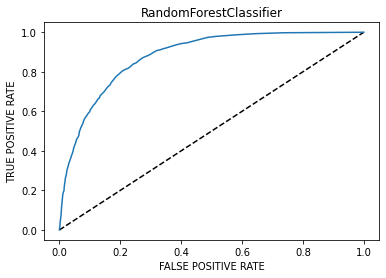

In [124]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("RandomForestClassifier")
plt.show()

Plotted the auc roc curve of the best model RandomForestClassifier

# SAVING THE BEST MODEL

In [118]:
import joblib
joblib.dump(rfc,"best_rfcfile222.obj")

['best_rfcfile222.obj']